In [10]:
import pandas as pd
import matplotlib.pyplot as plt



In [11]:
df = pd.read_csv('https://www.cryptodatadownload.com/cdd/Binance_ETHUSDT_d.csv',skiprows=1)
df_line = df.sort_values('Date')

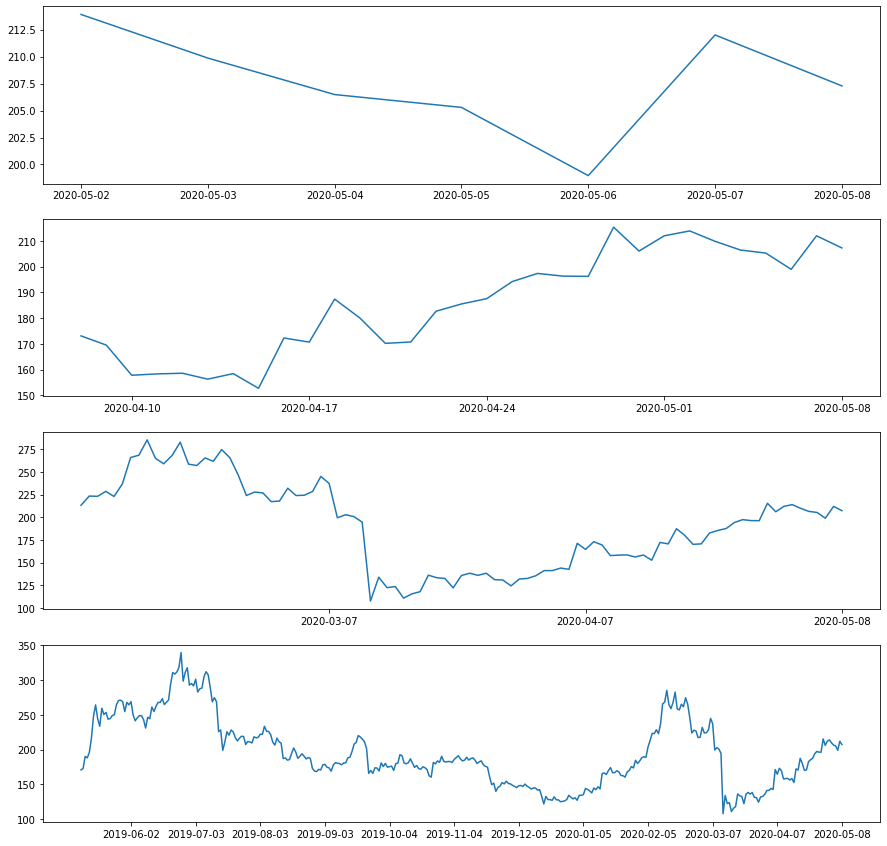

In [34]:
df_week  = df.iloc[0:7]
df_month = df.iloc[0:31]
df_quarter = df.iloc[0:93]
df_year  = df.iloc[0:366]
df_yesterday = df.iloc[0]

fig,ax = plt.subplots(4,1)

ax[0].plot(df_week.sort_values('Date')['Date'],df_week.sort_values('Date')['Close'])
ax[1].plot(df_month.sort_values('Date')['Date'],df_month.sort_values('Date')['Close'])
ax[2].plot(df_quarter.sort_values('Date')['Date'],df_quarter.sort_values('Date')['Close'])
ax[3].plot(df_year.sort_values('Date')['Date'],df_year.sort_values('Date')['Close'])

ax[1].set_xticks(ax[1].get_xticks()[::-7])
ax[2].set_xticks(ax[2].get_xticks()[::-31])
ax[3].set_xticks(ax[3].get_xticks()[::-31])

fig.set_figheight(15)
fig.set_figwidth(15)

plt.show()



In [80]:
df_lists = [df_week,df_month,df_quarter,df_year]
period_list = ['week','month','quarter','year']
quantiles = [0.9,0.7,0.5,0.3]
result_list = []

for num,df_list in enumerate(df_lists):
    result_sublist = []
    for quantile in quantiles:
        result = df_list.quantile(quantile)['Close']
        result_sublist.append(result)
    result_list.append(result_sublist)
            
output_dict = dict(zip(period_list,result_list))

print("Yesterday price was closed at ${}. \n".format(str(yesterday_close)))

for key in output_dict:
    if yesterday_close >= output_dict[key][0]:
        print("It's a very good price for this {}.".format(key))
    elif yesterday_close >= output_dict[key][1]:
        print("It's a good price for this {}.".format(key))
    elif yesterday_close >= output_dict[key][2]:
        print("It's an OK price for this {}.".format(key))
    elif yesterday_close >= output_dict[key][3]:
        print("It's an bad price for this {}.".format(key))
    else: 
        print("It's a terrible price for this {}.".format(key))

Yesterday price was closed at $207.28. 

It's an OK price for this week.
It's a good price for this month.
It's an OK price for this quarter.
It's an OK price for this year.
